Experiments were conducted to determine the speed of a sorting algorithm depending on the number of input elements.
The results are presented in the following table:

|Number of elements (x1000)|Time (secodns)|
|:-:|:-:|
|10|0.163928|
|20|0.53282|
|50|3.00007|
|100|11.2078|
|150|26.7487|
|200|47.3297|
|250|76.8061|

Determine approximately how many elements can be sorted in 30 sec.

In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import sys
sys.path.append('../util')

from newton_poly import newton_poly

In [4]:
nodes = np.array([10, 20, 50, 100, 150, 200, 250])
values = np.array([0.163928, 0.53282, 3.00007, 11.2078, 26.7487, 47.3297, 76.8061])

In [16]:
count = nodes.max() - nodes.min() + 1
points = np.linspace(nodes.min(), nodes.max(), count)
goal = 30

Let's use a functional approach to determine the number of elements for 30 seconds.

In [17]:
(desired_x := min(points, key = lambda curr_x: abs(newton_poly(nodes, values, curr_x) - goal)))

158.0

Now let's solve it with a declaritive approach, which will resolve in significantly more code that is prone to error.

In [19]:
desired_x = 0.0
last_closes_result = float('inf')

for i in range(0, count):
    curr_x = i + nodes.min()
    curr_y = newton_poly(nodes, values, curr_x)
    if abs(curr_y - goal) < last_closes_result:
        desired_x = curr_x
        last_closes_result = abs(curr_y - goal)

desired_x

158

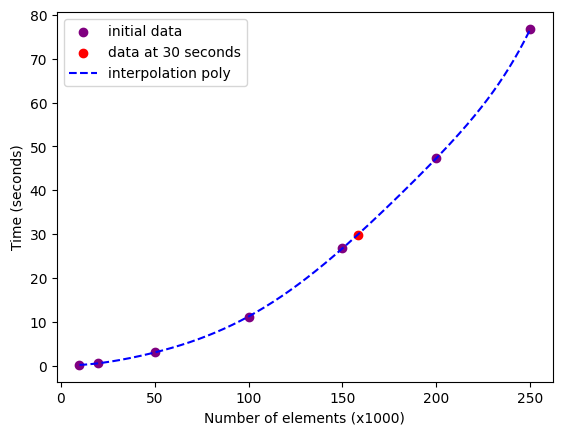

In [36]:
x_axis = np.linspace(nodes.min(), nodes.max(), 1000)

plt.scatter(nodes, values, color='purple')
plt.scatter([desired_x], [newton_poly(nodes, values, desired_x)], color='red')
plt.plot(x_axis, newton_poly(nodes, values, x_axis), color='blue', linestyle='dashed')
plt.legend(['initial data', 'data at 30 seconds', 'interpolation poly'])
plt.xlabel('Number of elements (x1000)')
plt.ylabel('Time (seconds)')
plt.show()